# Felin 2023

The purpose of this section is to update Configuration.py and Kinematics.py from Pupper to Felin, based on Stanford Quadruped open source project.
https://github.com/stanfordroboticsclub/StanfordQuadruped

In [1]:
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d    


Load felin configuration script based on Stanford Controller:

In [2]:
from Config import Configuration

# import configuration from felin
config = Configuration()

# Crouch

In the crouch pose, the robot touch the ground in multiples points of contacts:
* Body (battery holder),
* Four knees,
* Four feet.

So the crouch pose is defined by the following constants:

| Constant   | Value (m) | Description                                        |
|:---        |:---:      |:---:                                               |
| CROUCH_X  |  0.172    | Foot position along body X axis                    |
| CROUCH_Y  |  0.125    | Foot position along body Y axis                    |
| CROUCH_Z  | -0.054    | Foot position along body Z axis                    |
| CROUCH_X_SHIFT    | 0.018    | Foot offset along body X axis |


In [3]:
print("Default crouch pose in BRF (m):\n\n"+str(np.round(config.default_crouch,3))+"\n")

Default crouch pose in BRF (m):

[[ 0.19   0.19  -0.154 -0.154]
 [-0.125  0.125 -0.125  0.125]
 [-0.054 -0.054 -0.054 -0.054]]



In [4]:
from pytransform3d.urdf import UrdfTransformManager
from pytransform3d.transformations import plot_transform
from pytransform3d.plot_utils import make_3d_axis

Load felin URDF file:

In [5]:
tm = UrdfTransformManager()
with open('./felin.urdf', "r") as f:
    tm.load_urdf(f.read())

Apply IK on crouch pose in BRF:

In [6]:
import Kinematics
joint_position = Kinematics.four_legs_explicit_inverse_kinematics_BRF(config.default_crouch,config)
print("IK computed joint positions:\n\n"+str(np.round(np.degrees(joint_position),1))+"\n")

IK computed joint positions:

[[  5.   -5.    5.   -5. ]
 [160.  160.  160.  160. ]
 [ 24.4  24.4  24.4  24.4]]



HIPS extension and KNEE flexion are almost at their maximum.

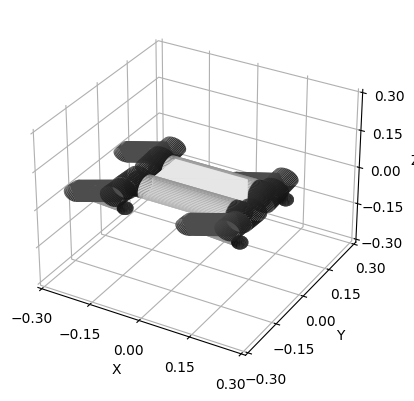

In [7]:
tm.set_joint("FR-ABD", joint_position[0,0])
tm.set_joint("FL-ABD", joint_position[0,1])
tm.set_joint("RR-ABD", joint_position[0,2])
tm.set_joint("RL-ABD", joint_position[0,3])

tm.set_joint("FR-HIPS", joint_position[1,0])
tm.set_joint("FL-HIPS", joint_position[1,1])
tm.set_joint("RR-HIPS", joint_position[1,2])
tm.set_joint("RL-HIPS", joint_position[1,3])

tm.set_joint("FR-KNEE", joint_position[2,0])
tm.set_joint("FL-KNEE", joint_position[2,1])
tm.set_joint("RR-KNEE", joint_position[2,2])
tm.set_joint("RL-KNEE", joint_position[2,3])

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax = tm.plot_connections_in("felin", ax=ax)
tm.plot_visuals("felin", ax_s=0.30, alpha=1.0)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.view_init(elev=10., azim=90)
plt.savefig(
    'crouch.png',
    format='png',
    bbox_inches='tight'
)
plt.show()